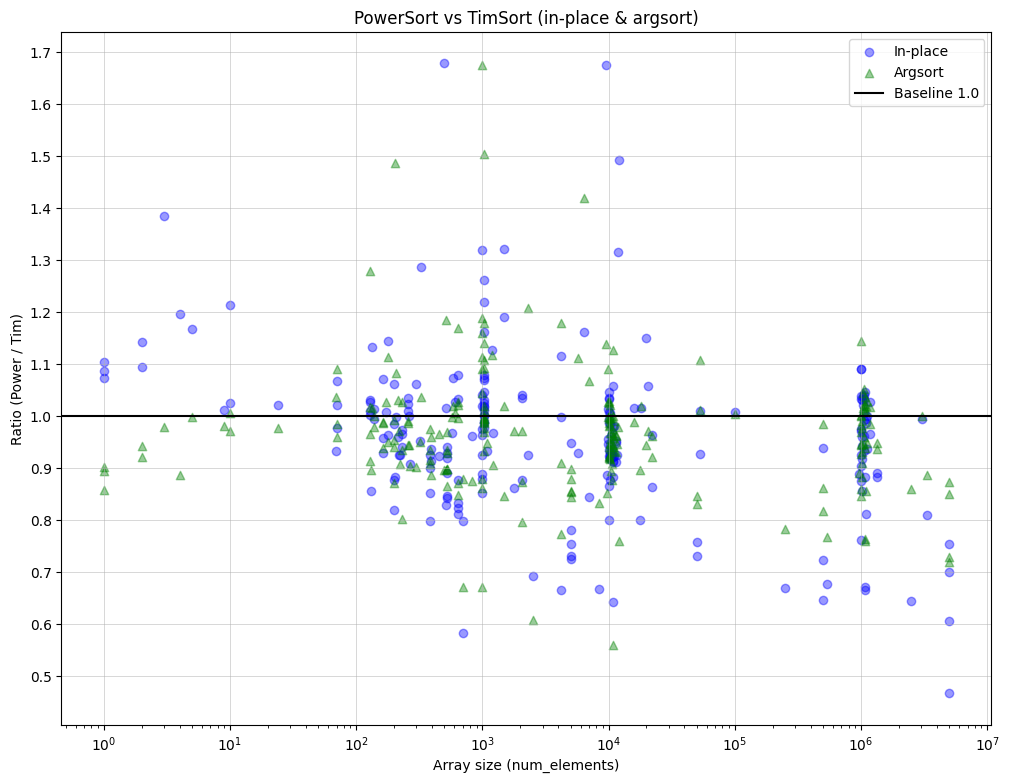

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

df = pd.read_csv("results.csv")

plt.figure(figsize=(12, 9))

plt.scatter(df["num_elements"], df["ratio_power_tim"], color="blue", alpha=0.4, label="In-place")

plt.scatter(df["num_elements"], df["ratio_apower_atim"], color="green", alpha=0.4, label="Argsort",  marker="^")

plt.axhline(1.0, color="black", label="Baseline 1.0")

plt.xlabel("Array size (num_elements)")
plt.ylabel("Ratio (Power / Tim)")
plt.title("PowerSort vs TimSort (in-place & argsort)")

plt.xscale("log")
plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))

plt.grid(True, linewidth=0.5, alpha=0.7)
plt.legend()
plt.show()


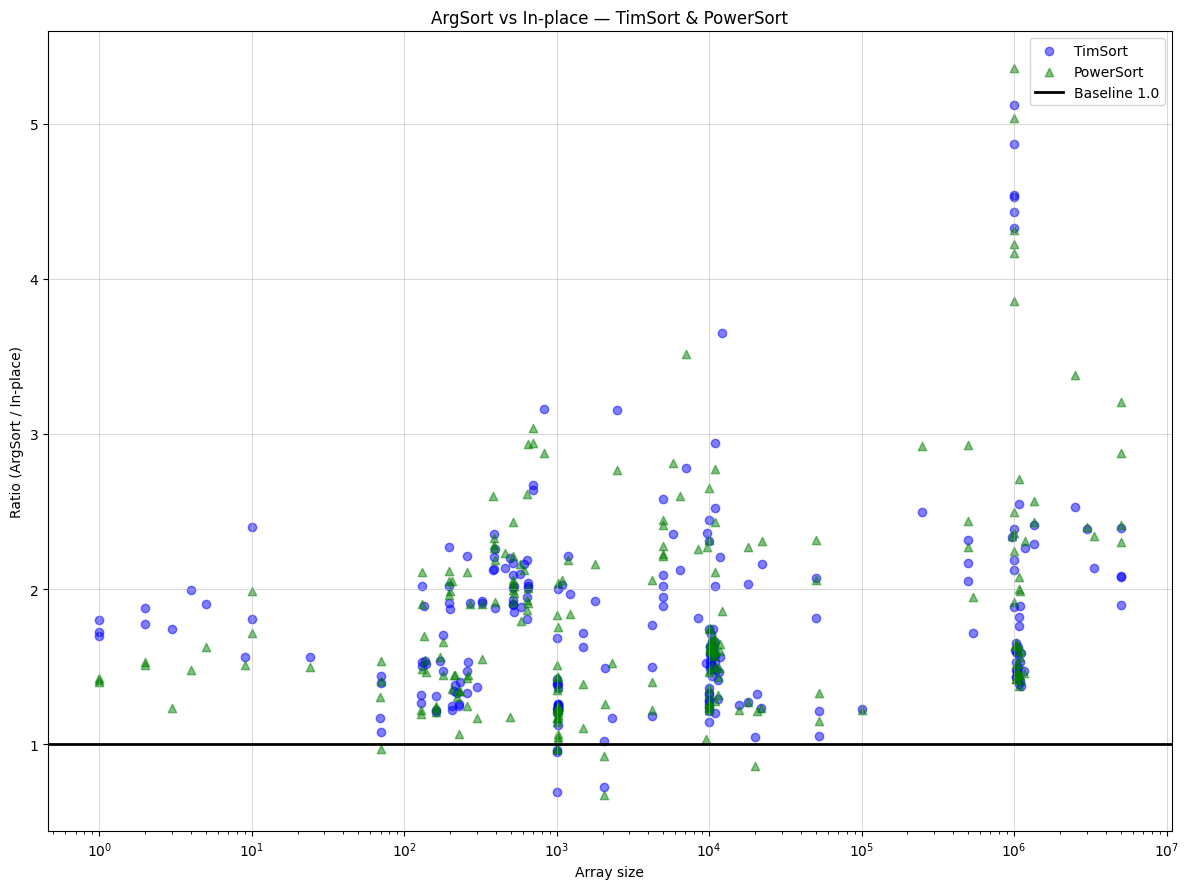

In [57]:
plt.figure(figsize=(12, 9))

df["ratio_tim_argsort_over_inplace"] = df["atim_mean_us"] / df["tim_mean_us"]
df["ratio_power_argsort_over_inplace"] = df["apower_mean_us"] / df["power_mean_us"]


# TimSort: ArgSort vs In-place
plt.scatter(
    df["num_elements"], df["ratio_tim_argsort_over_inplace"],
    color="blue", alpha=0.5, marker="o",
    label="TimSort"
)

# PowerSort: ArgSort vs In-place
plt.scatter(
    df["num_elements"], df["ratio_power_argsort_over_inplace"],
    color="green", alpha=0.5, marker="^",
    label="PowerSort"
)

plt.axhline(1.0, color="black", linewidth=2, label="Baseline 1.0")

plt.xlabel("Array size")
plt.ylabel("Ratio (ArgSort / In-place)")
plt.title("ArgSort vs In-place — TimSort & PowerSort")

plt.xscale("log")

plt.grid(True, linewidth=0.5, alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [58]:
df[df.num_elements > 5_000][[
    "ratio_power_tim",               # in-place Power/Tim
    "ratio_apower_atim",             # argsort Power/Tim
    "ratio_tim_argsort_over_inplace",   # argsort vs in-place Tim
    "ratio_power_argsort_over_inplace"  # argsort vs in-place Power
]].describe()

,ratio_power_tim,ratio_apower_atim,ratio_tim_argsort_over_inplace,ratio_power_argsort_over_inplace
count,112.000000,112.000000,112.000000,112.000000
mean,0.931553,0.951470,1.907818,1.972432
std,0.154970,0.100888,0.793112,0.812540
min,0.466672,0.559314,1.044791,0.857735
25%,0.883233,0.914783,1.468174,1.463764
50%,0.935156,0.960430,1.620252,1.635901
75%,1.005115,1.000171,2.164365,2.314487
max,1.674760,1.419490,5.122233,5.359728
